### The Zhang-Suen's Thinning Algorithm

In [ ]:
!wget https://www.dropbox.com/s/ufadmw4xbtpi2fc/japanese_character.png

--2021-04-12 21:25:39--  https://www.dropbox.com/s/ufadmw4xbtpi2fc/japanese_character.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ufadmw4xbtpi2fc/japanese_character.png [following]
--2021-04-12 21:25:39--  https://www.dropbox.com/s/raw/ufadmw4xbtpi2fc/japanese_character.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf2436ece0a52350c0c71c377fd.dl.dropboxusercontent.com/cd/0/inline/BMhYMWTX68pv7dsV_2iNZeflkQrMwu9EQ-8LSJ47EX2UZNU8Jxi9047F5XTdZpxlUZOY_uVSfjjulqh76LohOyFx3_CRLj7mgVqtjxPDV7d-d1TT1EjhzsMK5xBb8rLcYNY57FDfNfrL8ERewz3XGPeh/file# [following]
--2021-04-12 21:25:39--  https://ucf2436ece0a52350c0c71c377fd.dl.dropboxusercontent.com/cd/0/inline/BMhYMWTX68pv7dsV_2iNZeflkQrMwu9EQ-8LSJ47EX2UZNU8Jxi9047F5XTd

In [ ]:
import cv2
import numpy as np

img = cv2.imread('japanese_character.png', 0) #read the image
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
bin_thresh = (thresh1 == 0).astype(int) #convert the image to binary scale

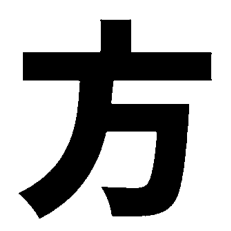

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(1 - bin_thresh, cmap='gray'), plt.axis("off") #show the image as the black pixels
plt.show()

**#Find the neighbours of the starting point img[x][y]**

In [ ]:
def neighbours(x,y,img):
    x_1 = x-1
    y_1 = y-1
    x1 = x+1
    y1 = y+1
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],    
                img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]   

**#Compute the number of transions from 0 to one in the sequence P2, P3, ... , P8, P9, P2**

In [ ]:
def transitions(neighbours):
    transition = 0
    n = neighbours + [neighbours[0]]
    for i in range(8):
      if ((n[i] == 0 ) and (n[i+1] == 1)): #check if there is a transition between i = 0 and i+1 = 1
             transition = transition + 1  # increase the number of transions in the neighbours by 1
    return transition 

**#Apply Zhang-Suen Thinning Algorithm**

In [ ]:
def zhangSuen(img):
    thin = img.copy()  #keep the original image safe from editing
    #initialize pointers to pixels that should set to 0
    step1 = 1 
    step2 = 1        
    while step1 or step2:   #loop until no changes happenes in step1 or step 2
        # Step 1
        step1 = [] #initialize an empty array to append the flagged pixels to be set to 0
        #set x to point for rows and y for columns
        rows, columns = thin.shape              
        for x in range(1, rows - 1):                     #loop for every row
            for y in range(1, columns - 1):              # loop for everycolumn
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, thin)
                #satisfy all the conditions
                if (thin[x][y] == 1             # Condition 0 
                   and  2 <= sum(n) <= 6        # Condition 1
                   and  transitions(n) == 1     # Condition 2  
                   and  P2 * P4 * P6 == 0       # Condition 3   
                   and P4 * P6 * P8 == 0):      # Condition 4
                    step1.append((x,y))
        for x, y in step1: 
            thin[x][y] = 0  #set the flagged pixels that satisfy the conditions to 0


        # Step 2 (same as step1)
        step2 = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, thin)
                if (thin[x][y] == 1              # Condition 0
                  and  2 <= sum(n) <= 6          # Condition 1
                  and  transitions(n) == 1       # Condition 2
                  and  P2 * P4 * P8 == 0         # Condition 3
                  and  P2 * P6 * P8 == 0):       # Condition 4
                    step2.append((x,y))    
        for x, y in step2: 
            thin[x][y] = 0
    return thin

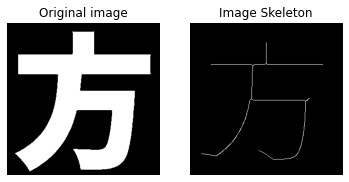

In [ ]:
# show the image and the skeleton
BW_Skeleton = zhangSuen(bin_thresh)
fig, ax = plt.subplots(1, 2)
ax1, ax2 = ax.ravel()
ax1.imshow(bin_thresh, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.axis('off')
ax2.imshow(BW_Skeleton, cmap=plt.cm.gray)
ax2.set_title('Image Skeleton')
ax2.axis('off')
plt.show()